In [8]:
import pandas as pd
df = pd.read_csv("D:/04_HOUSE PRICE PREDICTION/Pune house data.csv")
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
None


,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [11]:
df.describe()
df.describe(include=['object'])

,area_type,availability,size,society,total_sqft,site_location
count,13320,13320,13304,7818,13320,13319
unique,4,81,31,2688,2117,97
top,Super built-up Area,Ready To Move,2 BHK,GrrvaGr,1200,Alandi Road
freq,8790,10581,5199,80,843,139


area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64


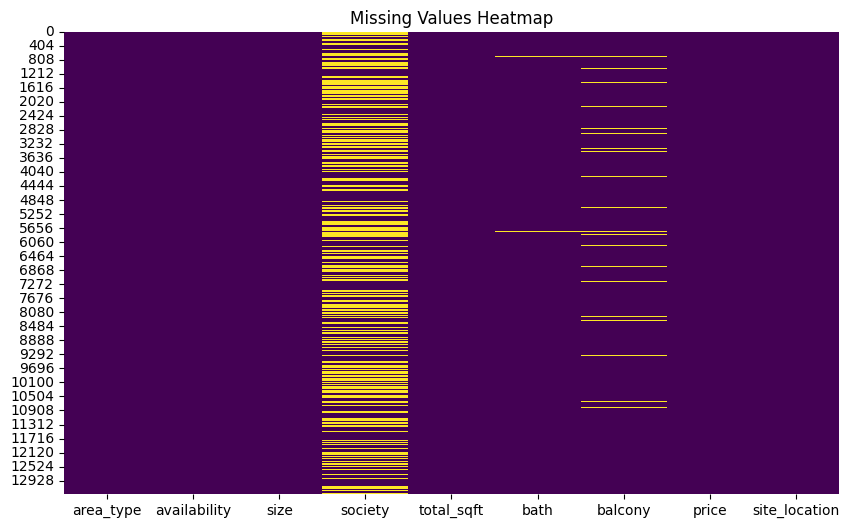

In [12]:
# Count missing values per column
missing_values = df.isnull().sum()
print(missing_values)

# Visualize missing values (optional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [13]:
# Calculate percentage of missing values per column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)


area_type         0.000000
availability      0.000000
size              0.120120
society          41.306306
total_sqft        0.000000
bath              0.548048
balcony           4.572072
price             0.000000
site_location     0.007508
dtype: float64


In [15]:
# Fill missing values for numerical columns
df['size'] = df['size'].fillna(df['size'].mode()[0])  # Replace with mode
df['bath'] = df['bath'].fillna(df['bath'].median())  # Replace with median


In [16]:
# Fill missing values for numerical columns
df['size'] = df['size'].fillna(df['size'].mode()[0])  # Replace with mode
df['bath'] = df['bath'].fillna(df['bath'].median())  # Replace with median


In [17]:
df['site_location'] = df['site_location'].fillna(df['site_location'].mode()[0])


In [18]:
# Check for remaining missing values
print(df.isnull().sum())


area_type           0
availability        0
size                0
society          5502
total_sqft          0
bath                0
balcony           609
price               0
site_location       0
dtype: int64


In [19]:
# Drop the 'society' column due to high missing values
df = df.drop(columns=['society'])


In [20]:
# Fill missing values in 'balcony' with the median
df['balcony'] = df['balcony'].fillna(df['balcony'].median())

# Alternatively, you can use the mode:
# df['balcony'] = df['balcony'].fillna(df['balcony'].mode()[0])


In [21]:
print(df.isnull().sum())


area_type        0
availability     0
size             0
total_sqft       0
bath             0
balcony          0
price            0
site_location    0
dtype: int64


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13320 non-null  object 
 3   total_sqft     13320 non-null  object 
 4   bath           13320 non-null  float64
 5   balcony        13320 non-null  float64
 6   price          13320 non-null  float64
 7   site_location  13320 non-null  object 
dtypes: float64(3), object(5)
memory usage: 832.6+ KB


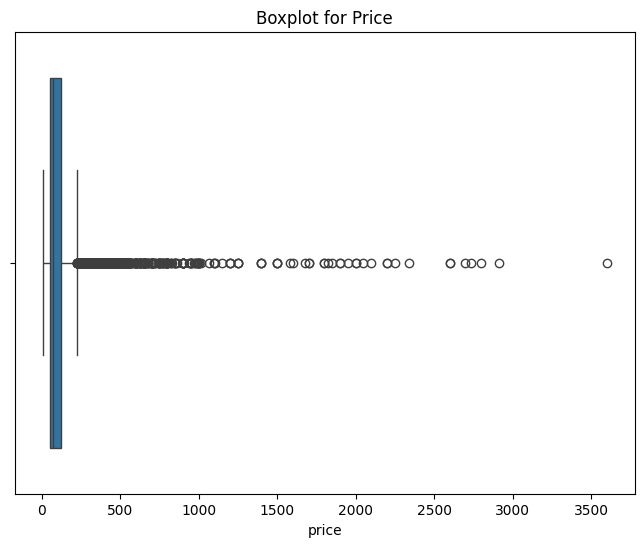

In [24]:
# Example: Detect outliers in the 'price' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot for Price')
plt.show()


In [25]:
# Check the statistical summary of the 'price' column
print(df['price'].describe())


count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64


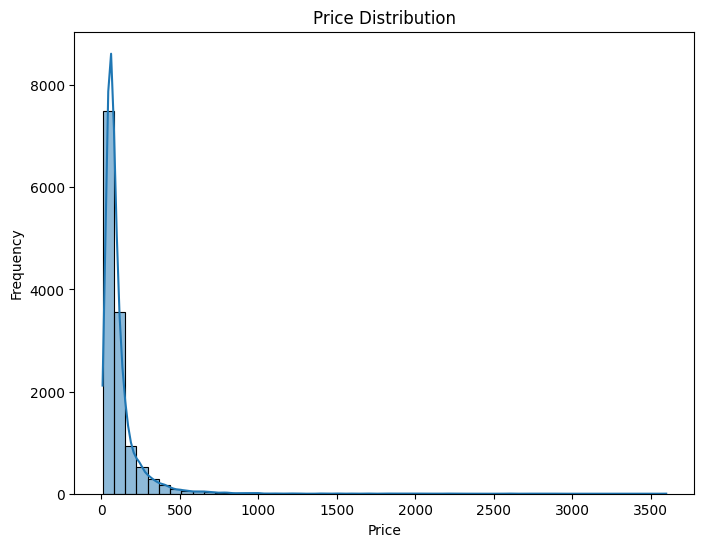

In [26]:
# Price distribution plot
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [27]:
# Calculate IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


Lower Bound: -55.0, Upper Bound: 225.0


In [28]:
# Count outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")


Number of outliers: 1276


In [29]:
# Remove outliers
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


In [30]:
# Cap prices at the upper bound
df['price'] = df['price'].apply(lambda x: min(x, upper_bound))


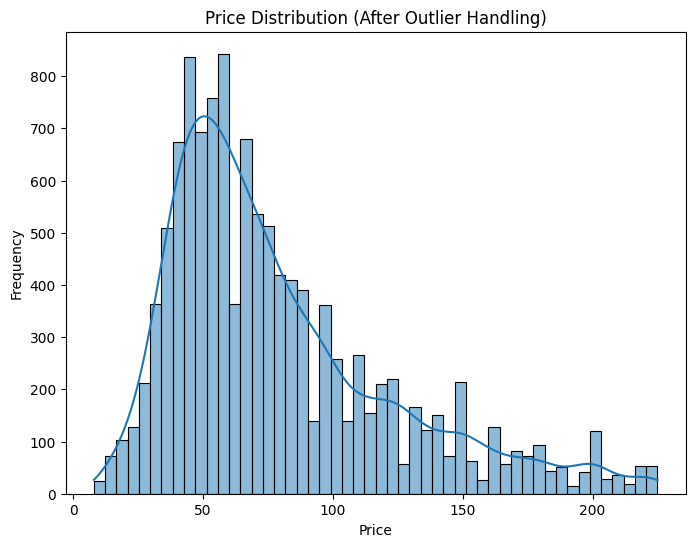

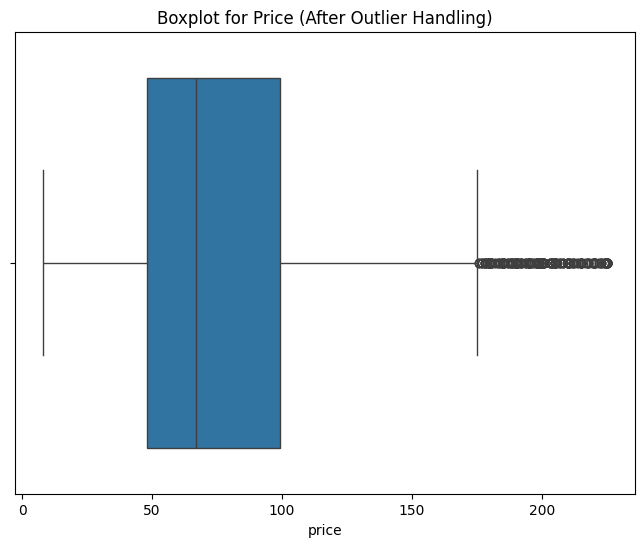

In [32]:
# Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Price Distribution (After Outlier Handling)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot for Price (After Outlier Handling)')
plt.show()


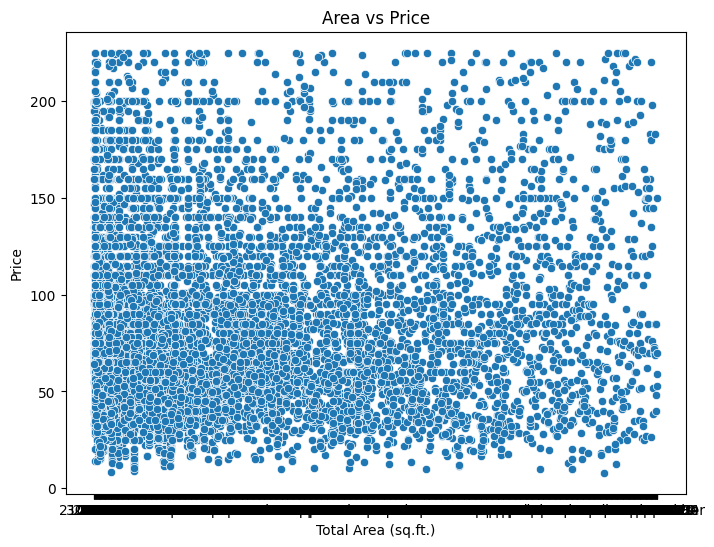

In [34]:
# Scatter plot: Area vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['total_sqft'], y=df['price'])
plt.title('Area vs Price')
plt.xlabel('Total Area (sq.ft.)')
plt.ylabel('Price')
plt.show()


site_location
Bibvewadi                     89.928110
Law College Road              89.038024
Erandwane                     88.132840
Gokhale Nagar                 87.366797
Dapodi                        87.262120
Khadaki                       86.366732
Kondhwa Budruk                85.760198
Aundh                         85.468866
Prabhat Road                  85.444919
Hadapsar Industrial Estate    85.297379
Name: price, dtype: float64


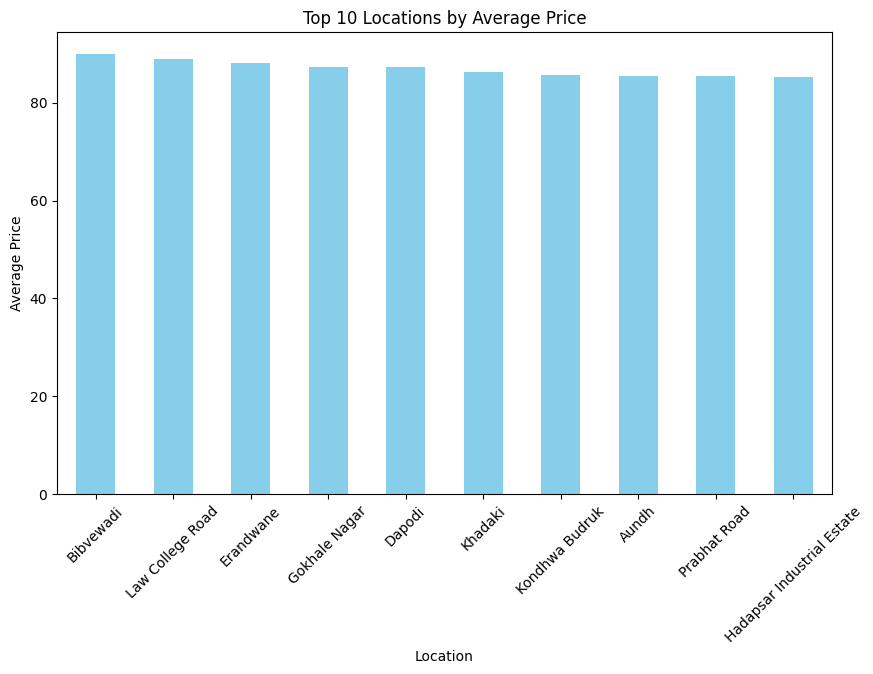

In [38]:
# Group data by 'location' and calculate mean price
avg_price_by_location = df.groupby('site_location')['price'].mean().sort_values(ascending=False)

# Top 10 locations by average price
print(avg_price_by_location.head(10))

# Visualize
plt.figure(figsize=(10, 6))
avg_price_by_location.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Locations by Average Price')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


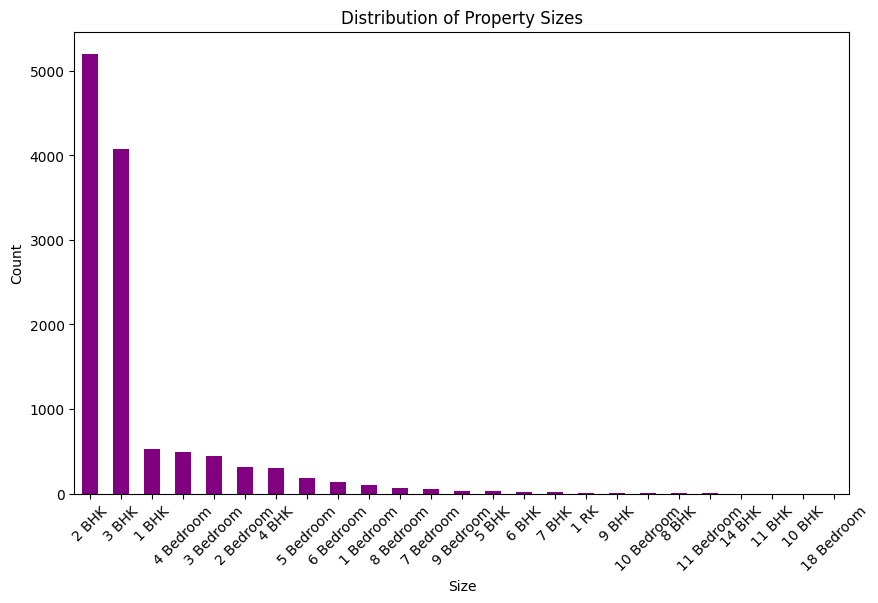

In [39]:
plt.figure(figsize=(10, 6))
df['size'].value_counts().plot(kind='bar', color='purple')
plt.title('Distribution of Property Sizes')
plt.xlabel('Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# EXTRA PART BY 

# statistical annalysis

In [40]:
# Descriptive statistics for numerical features
print(df.describe())


               bath       balcony         price
count  12044.000000  12044.000000  12044.000000
mean       2.509631      1.575971     79.385681
std        1.110961      0.792909     43.721310
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     48.000000
50%        2.000000      2.000000     67.000000
75%        3.000000      2.000000     99.170000
max       18.000000      3.000000    225.000000


In [41]:
# Calculate key statistical measures for price
mean_price = df['price'].mean()
median_price = df['price'].median()
std_price = df['price'].std()

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Standard Deviation of Price: {std_price}")


Mean Price: 79.38568125207571
Median Price: 67.0
Standard Deviation of Price: 43.721310479571564


## EXTRA BY CHATGPT

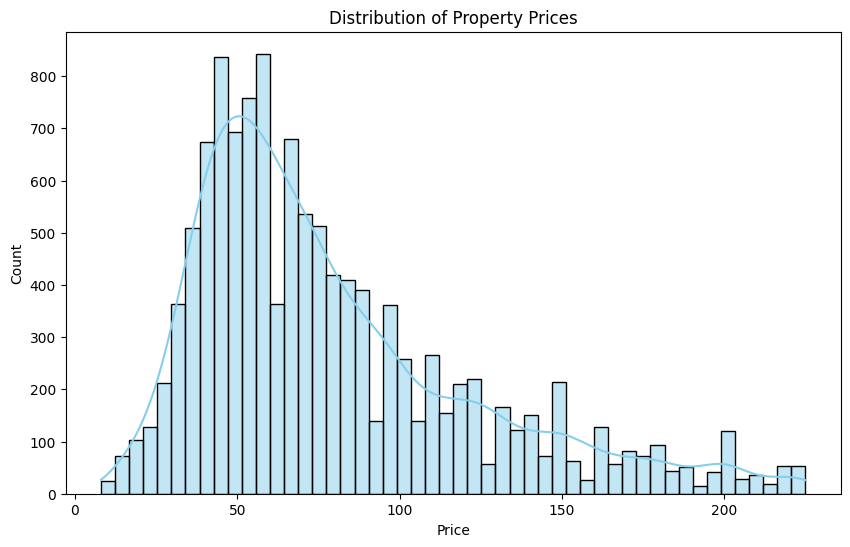

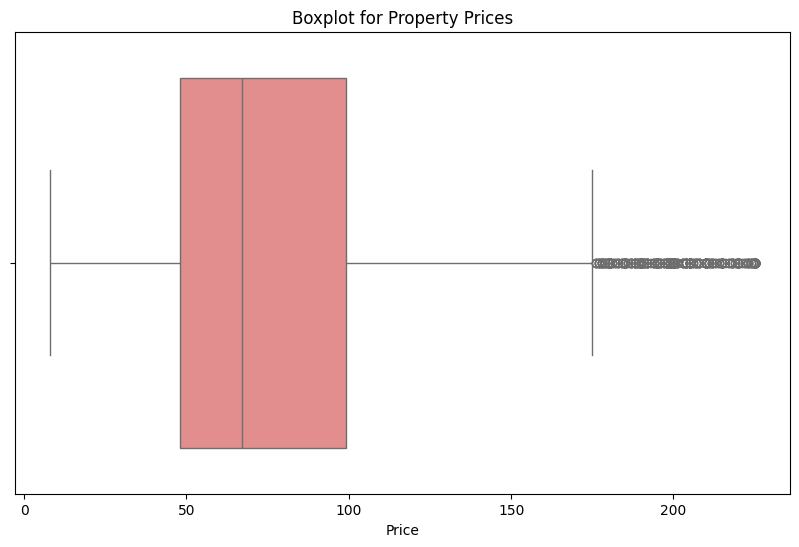

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram to visualize the price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Boxplot to detect outliers in the price column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'], color='lightcoral')
plt.title('Boxplot for Property Prices')
plt.xlabel('Price')
plt.show()


In [43]:
# Calculate mean price for each size
price_by_size = df.groupby('size')['price'].mean().sort_values(ascending=False)
print(price_by_size)


size
18 Bedroom    200.000000
9 BHK         173.000000
11 Bedroom    160.000000
10 BHK        160.000000
9 Bedroom     155.562500
4 BHK         151.907549
11 BHK        150.000000
8 Bedroom     144.080645
7 BHK         140.571429
10 Bedroom    138.000000
8 BHK         137.500000
7 Bedroom     134.150000
6 Bedroom     130.939850
4 Bedroom     130.323901
5 Bedroom     130.267380
6 BHK         129.782609
5 BHK         128.035714
14 BHK        125.000000
3 Bedroom     110.474730
3 BHK          91.275077
2 Bedroom      86.367962
1 Bedroom      65.072970
2 BHK          56.913543
1 BHK          34.790526
1 RK           28.122308
Name: price, dtype: float64


In [44]:
from scipy.stats import ttest_ind

# Extract prices for 2BHK and 3BHK
bhk_2_price = df[df['size'] == '2 BHK']['price']
bhk_3_price = df[df['size'] == '3 BHK']['price']

# Perform t-test
t_stat, p_value = ttest_ind(bhk_2_price, bhk_3_price, nan_policy='omit')
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The average price for 2BHK and 3BHK is significantly different.")
else:
    print("No significant difference in average price for 2BHK and 3BHK.")


T-statistic: -53.36135128006463, P-value: 0.0
The average price for 2BHK and 3BHK is significantly different.


In [45]:
from scipy.stats import mannwhitneyu

# Extract prices for 2BHK and 3BHK
bhk_2_price = df[df['size'] == '2 BHK']['price']
bhk_3_price = df[df['size'] == '3 BHK']['price']

# Perform the Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(bhk_2_price, bhk_3_price, alternative='two-sided')

print(f"U-statistic: {u_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The price distributions for 2BHK and 3BHK are significantly different.")
else:
    print("No significant difference in price distributions for 2BHK and 3BHK.")
    


U-statistic: 4387893.0, P-value: 0.0
The price distributions for 2BHK and 3BHK are significantly different.


C:\Users\bhush\AppData\Local\Temp\ipykernel_6476\2781361151.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Size', loc='upper right', bbox_to_anchor=(1, 1))


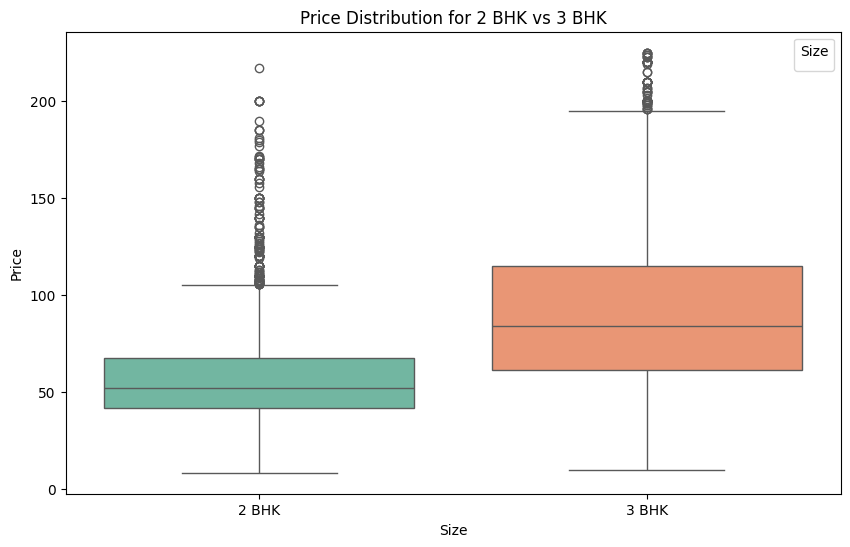

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to visualize the price distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='size', y='price', data=df[df['size'].isin(['2 BHK', '3 BHK'])], palette='Set2', hue='size')
plt.title('Price Distribution for 2 BHK vs 3 BHK')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend(title='Size', loc='upper right', bbox_to_anchor=(1, 1))
plt.show()


In [48]:
# Calculate IQR
Q1 = df['price'].quantile(0.25)  # 25th percentile
Q3 = df['price'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


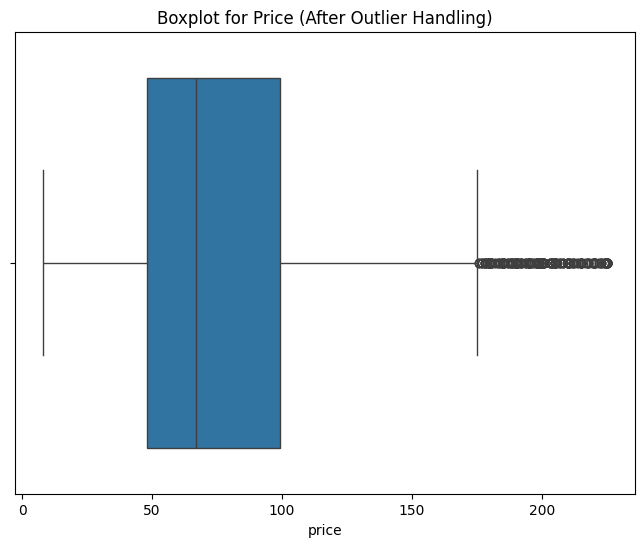

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot for Price (After Outlier Handling)')
plt.show()

In [50]:
# Assuming df is your dataframe
unique_societies = df['society'].unique()

# To see the unique society names
print(unique_societies)


KeyError: 'society'

In [51]:
import pandas as pd
df = pd.read_csv("D:/04_HOUSE PRICE PREDICTION/Pune house data.csv")
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
None


,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [54]:
# Assuming df is your dataframe
unique_societies = df['society'].unique()

# To see the unique society names
print(unique_societies)


['Coomee ' 'Theanmp' nan ... 'SJovest' 'ThhtsV ' 'RSntsAp']


In [56]:
print(df)

                  area_type   availability       size  society total_sqft  \
0      Super built-up  Area         19-Dec      2 BHK  Coomee        1056   
1                Plot  Area  Ready To Move  4 Bedroom  Theanmp       2600   
2            Built-up  Area  Ready To Move      3 BHK      NaN       1440   
3      Super built-up  Area  Ready To Move      3 BHK  Soiewre       1521   
4      Super built-up  Area  Ready To Move      2 BHK      NaN       1200   
...                     ...            ...        ...      ...        ...   
13315        Built-up  Area  Ready To Move  5 Bedroom  ArsiaEx       3453   
13316  Super built-up  Area  Ready To Move      4 BHK      NaN       3600   
13317        Built-up  Area  Ready To Move      2 BHK  Mahla T       1141   
13318  Super built-up  Area         18-Jun      4 BHK  SollyCl       4689   
13319  Super built-up  Area  Ready To Move      1 BHK      NaN        550   

       bath  balcony   price         site_location  
0       2.0      1.0  